# Predicting Housing Prices

In [76]:
import pandas as pd   #
import os
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Desktop\\Housing_data\\Housing.csv")

In [4]:
os.getcwd()

'C:\\Users\\Asus'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

# Area vs price plot

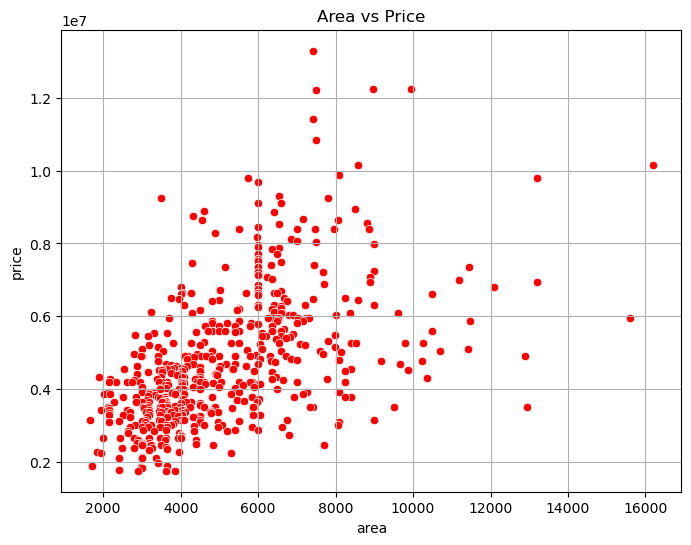

In [80]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data =df, color='red')
plt.title('Area vs Price')
plt.xlabel('area')
plt.ylabel('price')
plt.grid(True)
plt.show()

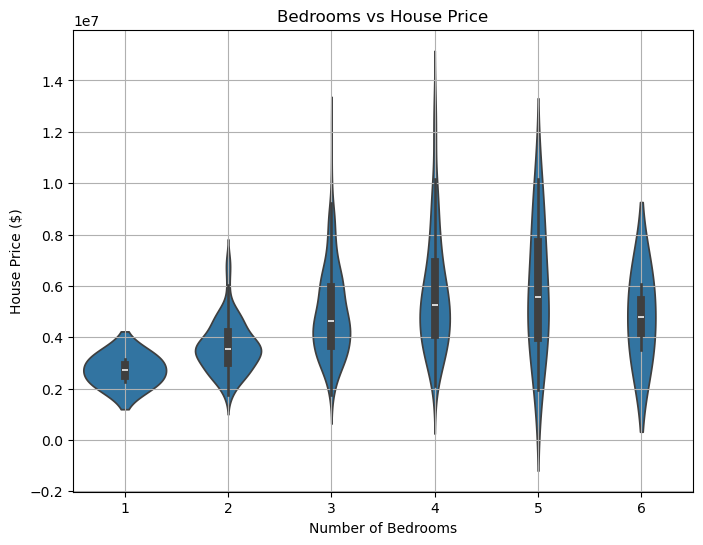

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='bedrooms', y='price', data=df)
plt.title('Bedrooms vs House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Price ($)')
plt.grid(True)
plt.show()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80')])

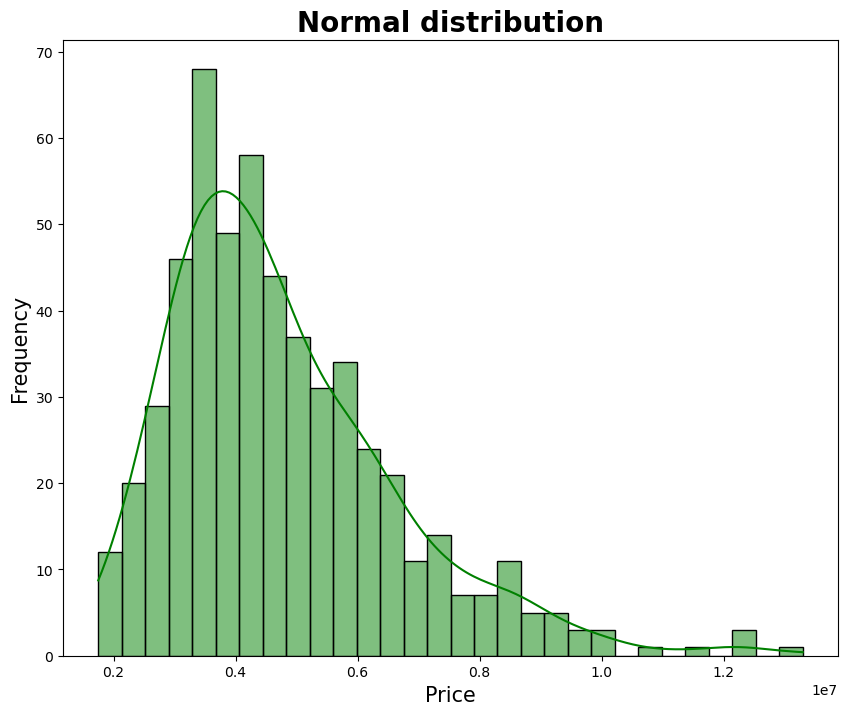

In [33]:
plt.figure(figsize=(10, 8))
sns.histplot(df['price'], bins=30, kde=True, color='green', edgecolor='black')
plt.title('Normal distribution', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

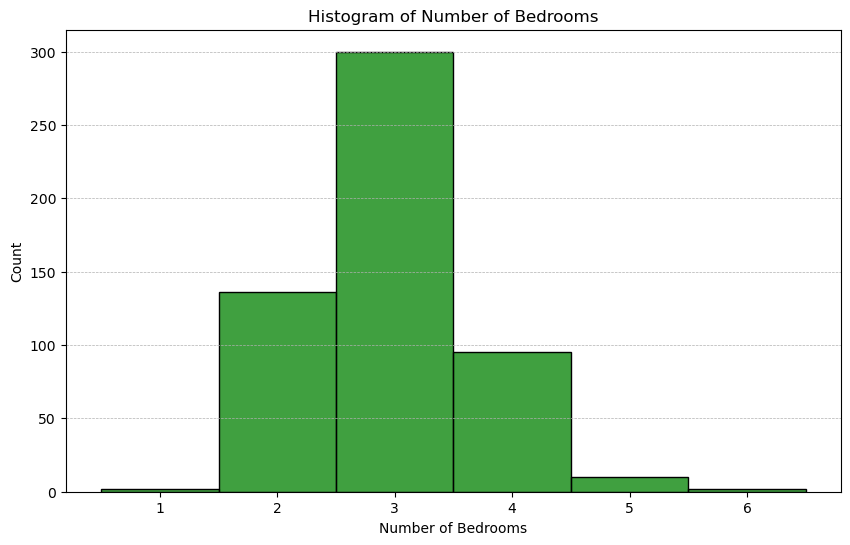

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], bins=range(1, 6), discrete=True, color ='green')

# Customize labels
plt.title('Histogram of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

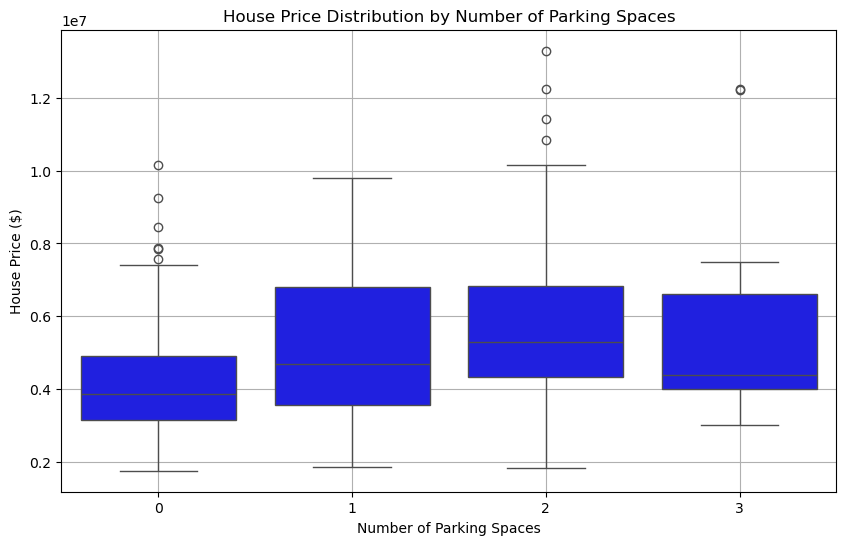

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parking', y='price', data=df, color ='blue')
# Customize labels and title
plt.title('House Price Distribution by Number of Parking Spaces')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('House Price ($)')
plt.grid(True)

plt.show()

In [62]:
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575176, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693418,

In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

2750040479309.0513
0.45592991188724474


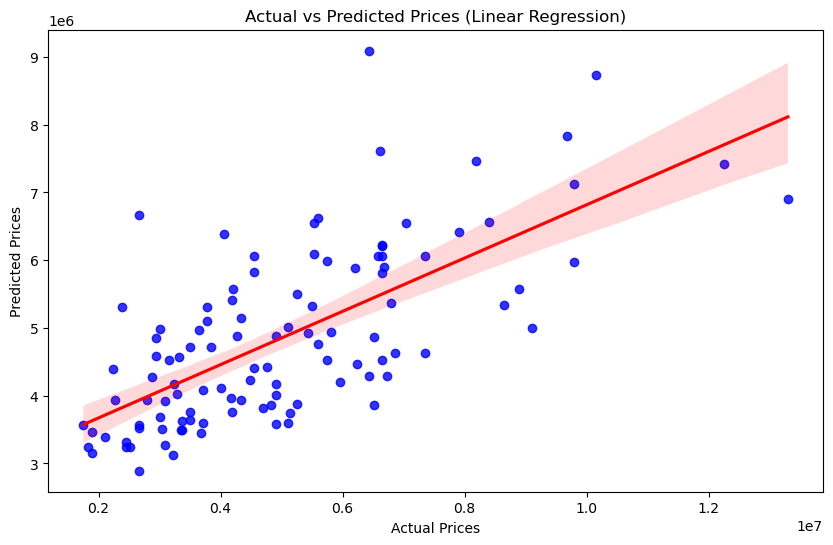

In [72]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Customize labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')

plt.show()

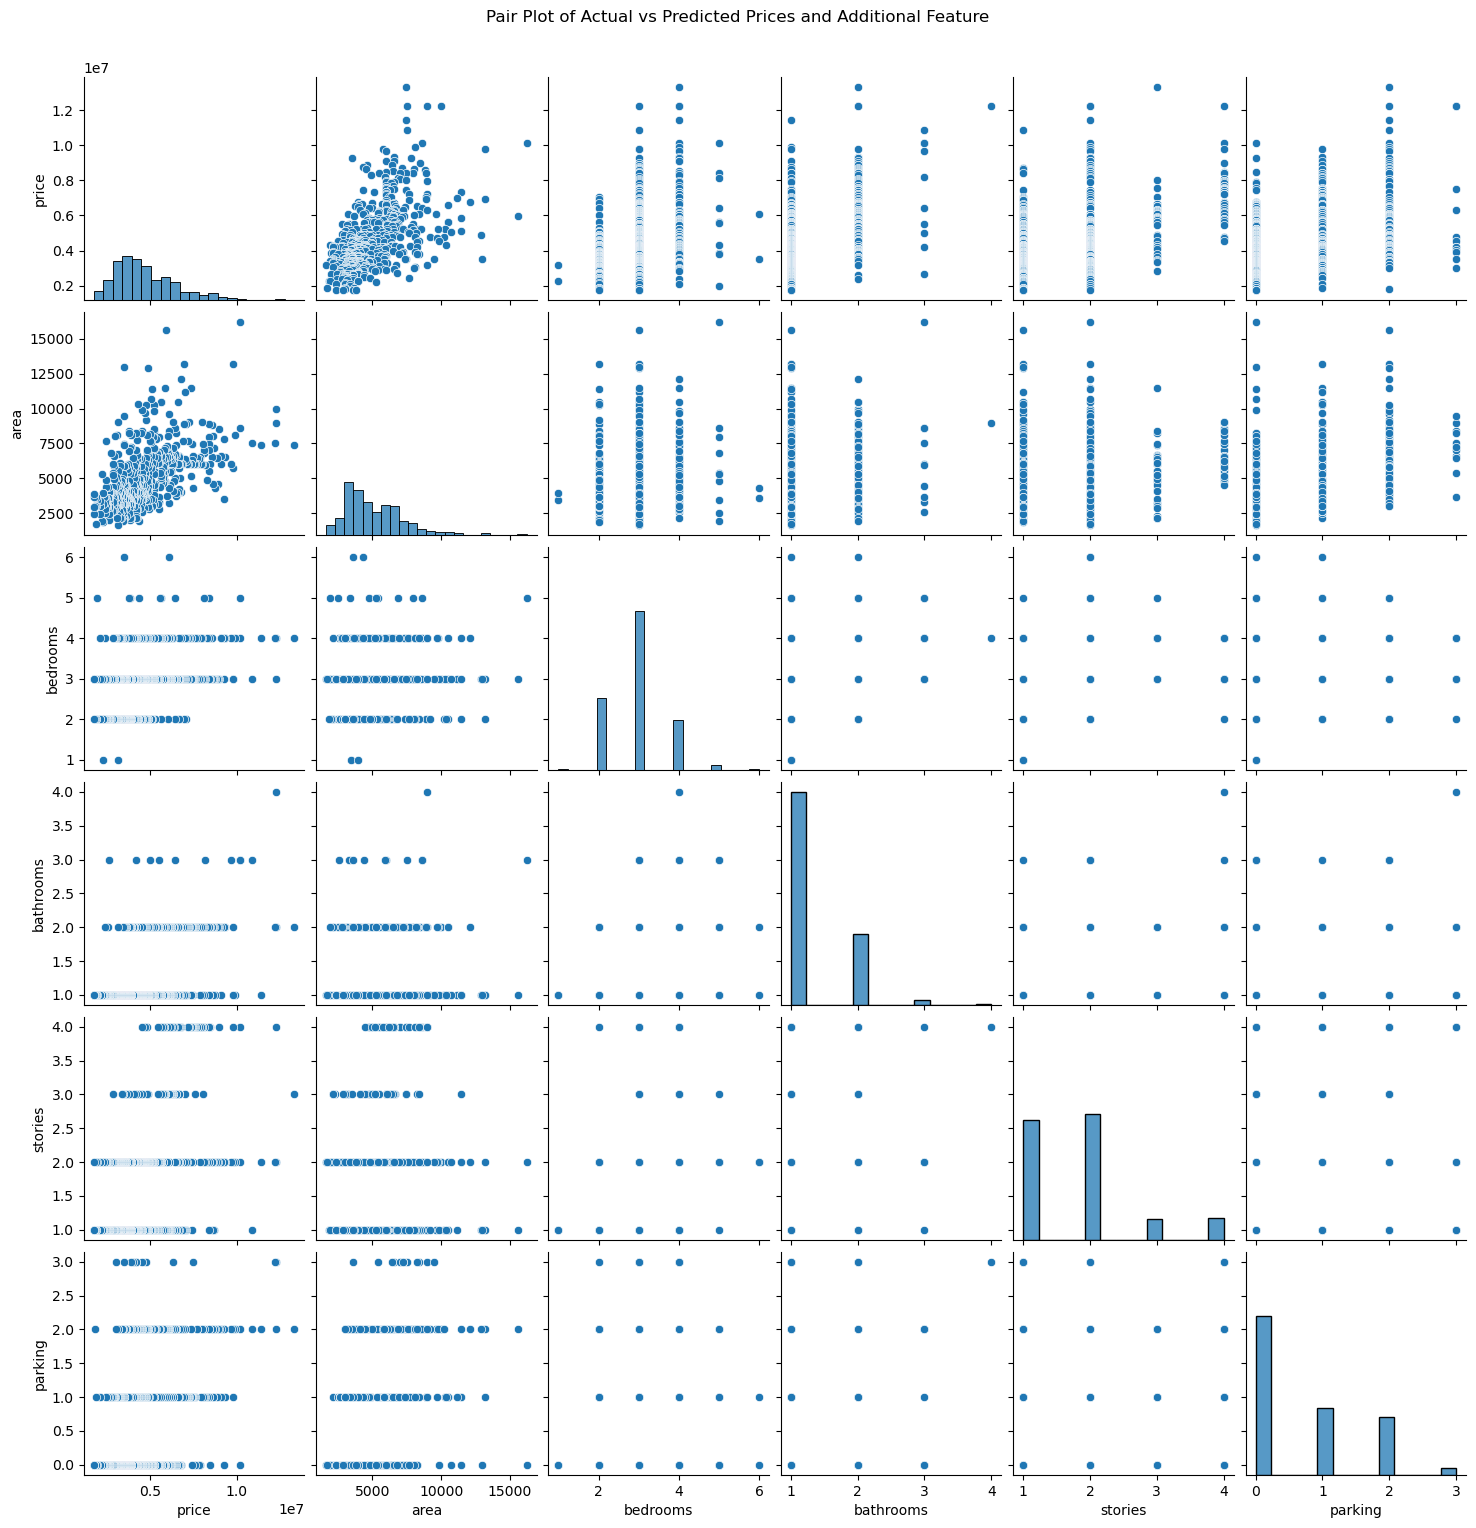

In [73]:
sns.pairplot(df)


plt.suptitle('Pair Plot of Actual vs Predicted Prices and Additional Feature', y=1.02)

plt.show()